In [1]:
"""
Exp03B: Risk-off Gate Sensitivity (Threshold & Lookback)

Goal:
- Examine how the effectiveness of a risk-off gate depends on its threshold and lookback window.


Fixed:
- Vol targeting: off


Sweep:
- Gate threshold ∈ {low → medium → high}
- Gate lookback ∈ {short → medium → long}

1️⃣ Gate threshold（什么时候进入 risk-off）
GATE_VOL_THRESHOLD ∈ {0.15, 0.20, 0.25}
0.15：早介入（偏保守）
0.20：中等
0.25：只在极端波动时介入

2️⃣ Gate lookback（多快“感知”风险）
GATE_LOOKBACK ∈ {10, 20, 60}
lookback	行为
10	非常敏感，容易频繁开/关
20	市场标准
60	慢反应，只在结构性风险时关



Evaluation:
- Annual Return
- Max Drawdown
- Sharpe
- Visual comparison of equity & drawdown curves

"""

'\nExp03B: Risk-off Gate Sensitivity (Threshold & Lookback)\n\nGoal:\n- Examine how the effectiveness of a risk-off gate depends on its threshold and lookback window.\n\n\nFixed:\n- Vol targeting: off\n\n\nSweep:\n- Gate threshold ∈ {low → medium → high}\n- Gate lookback ∈ {short → medium → long}\n\n1️⃣ Gate threshold（什么时候进入 risk-off）\nGATE_VOL_THRESHOLD ∈ {0.15, 0.20, 0.25}\n0.15：早介入（偏保守）\n0.20：中等\n0.25：只在极端波动时介入\n\n2️⃣ Gate lookback（多快“感知”风险）\nGATE_LOOKBACK ∈ {10, 20, 60}\nlookback\t行为\n10\t非常敏感，容易频繁开/关\n20\t市场标准\n60\t慢反应，只在结构性风险时关\n\n\n\nEvaluation:\n- Annual Return\n- Max Drawdown\n- Sharpe\n- Visual comparison of equity & drawdown curves\n\n'

In [2]:
import os
os.chdir("/Users/kim/Desktop/Quant-Research")
print(os.getcwd())

# os.chdir("..")
# print(os.getcwd())

/Users/kim/Desktop/Quant-Research


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from config import Config
from runner import run
from risk.risk_off_gate import risk_off_gate_vol

In [4]:
### baseline:  config
from dataclasses import replace
cfg_base = replace(Config(), 
                   RISK_MODE="none", # # Exp03A: isolate gate effect (vol_target: off)
                   MA_WINDOW=80   # 和Exp02同
                  )   

In [6]:
from dataclasses import replace
import pandas as pd
from runner import run

thresholds = [0.15, 0.20, 0.25]   # 年化阈值 (annualized)
lookbacks  = [10, 20, 60]

rows = []

for th in thresholds:
    for lb in lookbacks:
        cfg_tmp = replace(
            cfg_base,
            USE_RISK_OFF_GATE=True,
            GATE_VOL_THRESHOLD_ANNUAL=th,
            GATE_LOOKBACK=lb,
        )

        _, s = run(cfg_tmp)
        s["threshold_annual"] = th
        s["lookback"] = lb
        rows.append(s)

exp03b = pd.DataFrame(rows)
exp03b


/Users/kim/Desktop/Quant-Research/data/loaders.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(path, index_col=0, parse_dates=True)
/Users/kim/Desktop/Quant-Research/data/loaders.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  idx = pd.to_datetime(df.index, errors="coerce")
/Users/kim/Desktop/Quant-Research/data/loaders.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(path, index_col=0, parse_dates=True)
/Users/kim/Desktop/Quant-Research/data/loaders.py:22: UserWarning: Could not infer format, so each element will be parsed in

,Annual Return,Max Drawdown,Sharpe,Total Turnover,N_obs,threshold_annual,lookback
0,0.054044,-0.150380,0.654023,113.0,2436,0.15,10
1,0.065418,-0.126719,0.810737,70.0,2436,0.15,20
2,0.029936,-0.188466,0.398757,70.0,2436,0.15,60
3,0.056365,-0.176155,0.592418,108.0,2436,0.20,10
4,0.057745,-0.138840,0.607957,100.0,2436,0.20,20
5,0.055524,-0.189431,0.603418,90.0,2436,0.20,60
6,0.048601,-0.207742,0.496082,116.0,2436,0.25,10
7,0.066519,-0.177256,0.654353,104.0,2436,0.25,20
8,0.062446,-0.196820,0.634090,100.0,2436,0.25,60


<Axes: title={'center': 'Exp03B | Sharpe by Gate Threshold & Lookback'}, xlabel='lookback'>

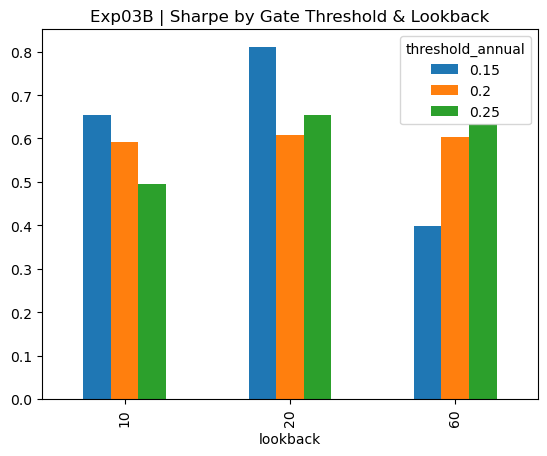

In [11]:
### 🔹 Sharpe heatmap（核心）

pivot = exp03b.pivot(
    index="lookback",
    columns="threshold_annual",
    values="Sharpe"
)

pivot.plot(kind="bar", title="Exp03B | Sharpe by Gate Threshold & Lookback")


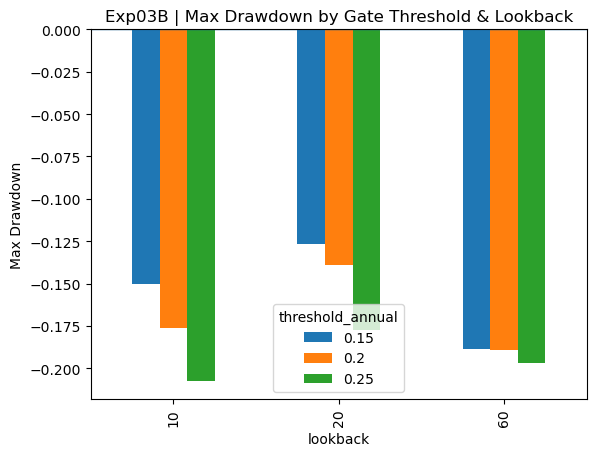

In [12]:
### MDD pivot（行=lookback，列=threshold）
pivot_mdd = exp03b.pivot(
    index="lookback",
    columns="threshold_annual",
    values="Max Drawdown",
)

ax = pivot_mdd.plot(
    kind="bar",
    title="Exp03B | Max Drawdown by Gate Threshold & Lookback",
)
ax.set_ylabel("Max Drawdown")
ax.axhline(0, linewidth=1)